# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:
#IMPORTING LIBRARIES

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]}, index = range(1,11))
student_data

,Age,Tardies
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0
10,30,3


Draw a dispersion diagram (scatter plot) for the data.

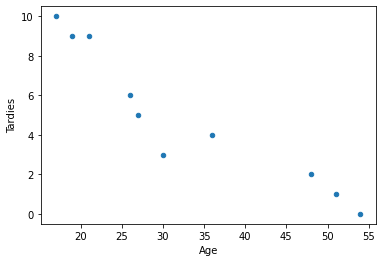

In [4]:
student_data.plot.scatter(x ='Age', y = 'Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Yes, the older the student is, less times is late to class. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [35]:
# The covariance of the variables will give us information about the direction of the relationship between the variables.
# We need to calculate the mean of variable Age and variable Tardies and the product of every element in Age and Tardies
Age_mean = student_data.Age.mean()
Tardies_mean = student_data.Tardies.mean()

#Turning pandas series into lists. 
lst_AGE = list(student_data.Age)
lst_Tardies = list(student_data.Tardies)


In [25]:
"""This function takes as arguments the list of variable x, list of variable y and the mean of each list
In the for loop, for the range on the list, it builds a variable where each element of each lst gets subtracted by 
the mean and gets multiplied for the other list element.

In the end, the summatory of all those operations gets divided by the length of the list minus 1, which is n"""

def covarfn(a, b, av_a, av_b): 
    cov = 0
    for i in range(0, len(a)): 
        cov += (a[i] - av_a) * (b[i] - av_b) 
    return (cov / (len(a)-1))

covarfn(lst_AGE, lst_Tardies, Age_mean, Tardies_mean)

-45.56666666666667

In [28]:
covar = student_data.Age.cov(student_data.Tardies)

covar

-45.56666666666666

In [37]:
r, _ = stats.pearsonr(student_data.Age, student_data.Tardies)
r1 = student_data['Age'].corr(student_data['Tardies'])

print("The covariance is", covar, "and the correlation is", r)

The covariance is -45.56666666666666 and the correlation is -0.9391626886887121


In [ ]:
"""As expected, both results are negative, since the covariance is telling us the direction and the 
correlation, which is normalized, is telling us the relationships between two variables

The relationship between this two variables is strongly negative"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [39]:
model = LinearRegression()

In [52]:
X = student_data[['Age']]
y = student_data['Tardies']

model.fit(X,y)
print(model.score(X,y))

y_pred = model.predict(X)

0.8820265558250109


In [51]:
slope, intercept, r , pval, std_err = stats.linregress(student_data['Age'], student_data['Tardies'])

print('slope: ',slope)
print('intercept: ',intercept)
print('r: ', r)
print('p_val: ', pval)
print('std_err: ', std_err)

slope:  -0.2428207709159808
intercept:  12.888803363135768
r:  -0.9391626886887121
p_val:  5.56665383455343e-05
std_err:  0.03139728816158607


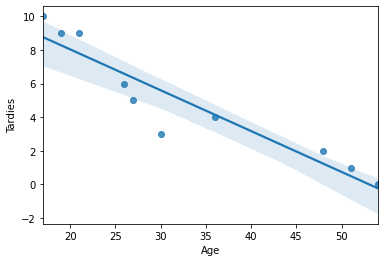

In [49]:
sns.regplot(data=student_data, x='Age', y='Tardies');

Plot your regression model on your scatter plot.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# The model score is 0.88, which is pretty good. We know that 88% of the Tardiness is related to the age of the students. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [53]:
# Import any libraries you may need & the data
cars = pd.read_csv('vehicles.csv')
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [60]:
# Your response here. 
cars.corr()['CO2 Emission Grams/Mile'].loc[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

In [ ]:
#Apparently Fuel Barrels per Year and Fuel Cost per Year have a positive strong correlation with CO2 Emissions Grams
#Meanwhile, Combined MPG has a strong negative correlation. 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 

In [61]:
model = LinearRegression()

X = cars[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y = cars['CO2 Emission Grams/Mile']

model.fit(X,y)
print(model.score(X,y))

y_pred = model.predict(X)

0.9808734920269122


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

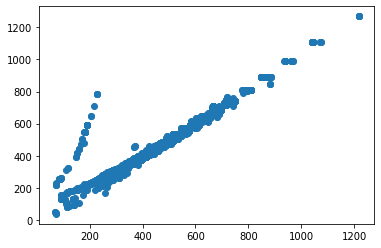

In [62]:
# Your response here. 
plt.scatter(y_pred,y);

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 